# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID:  <br>
YOUR-NAME:   <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [31]:
#()
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show('Levenberg–Marquardt')

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gradient Descent converged at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            converged = 1
            break
    if(converged==0):
        print("gradient descent algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gradient Descent")
    return yPredicted,np.array(loss_arr)

def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gauss Newton converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            converged = 1
            break
    if(converged==0):
        print("Gauss Newton Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
    return yPredicted,np.array(loss_arr)
def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    """
    if the learning rate is less than 0.0001 then on dividing by 10 further svd(np.linalg.pinv finds sudo inverse using svd) is not able to find sol and error is thrown
    Hence explicitly handling it by not decreasing learning rate if it is already less than 0.00001
    """
    iterations = 1000
    loss_arr = []
    converged = 0
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss <= squaredDistance:
                if(lr>0.00001):
                    lr /= 10
            else:
                lr *= 10
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Levenberg–Marquardt converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            converged = 1
            
            break
    if(converged==0):
        print("The Levenberg–Marquardt Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
    return yPredicted,np.array(loss_arr)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [32]:
def combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)

   
    plt.plot(lgd,'r--',label = 'Gradient Descent')
    plt.plot(lgn,'m.',label = 'Gauss Newton')
    plt.plot(llm,'g*',label = 'Levenberg–Marquardt')
    plt.title('loss vs number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(122)
    
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yObserved,'b.')
    plt.plot(xObserved,ygd,'r',label = 'Gradient Descent')
    plt.plot(xObserved,ygn,'m',label = 'Gauss-Newton')
    plt.plot(xObserved,ylm,'g',label = 'Levenberg–Marquardt')
    plt.title('Combined Data and fit plot')
    plt.legend()
  
    plt.show()
    

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.00038106941686028484  s_est: 20.089773728976823


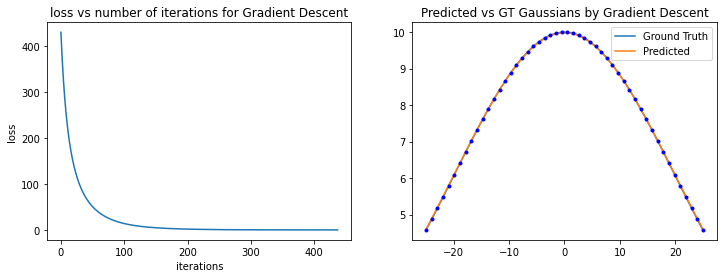

Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192


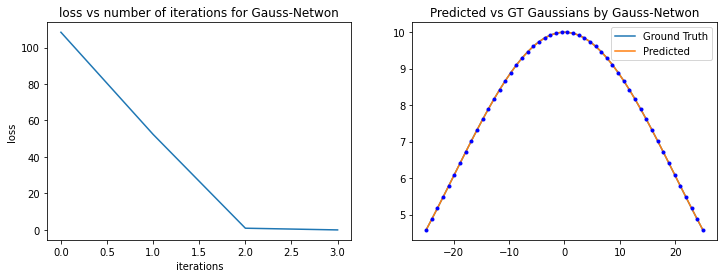

Levenberg–Marquardt converges at iteration  2
loss: 5.730362110598657
a_est: 10.254077061575403  m_est: -1.0498505979479558  s_est: 18.798688886556164


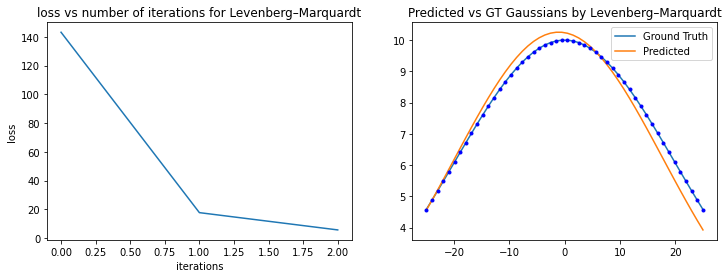

From the above graphs we can see that for the parameters that Gradient descent performs poorly when compared to the other two. This is observable from the number of iterations taken for each algorithm to converge. The graph for Gradient descent is on another scale. This demonstrates the superiority of the other two optimisation methods to gradient descent.
While for the given set of initialisations, Gauss newton outperforms gradient descent, this observation is extended for other initialisations as well. Gauss newton is able to converge to the local minima faster than gradient descent as it assumes that each funcion is locally quadratic.
Sadly, that comes with it's own drawbacks, this involves knowledge obtained from the second derivate, computation of which is very intensive and thus proves to be rather infeasible.
This is where the Levenberg–Marquardt algorithm comes into its own. When far away from a minima, it acts like a gradient descent optimisation method. This is feasible thank

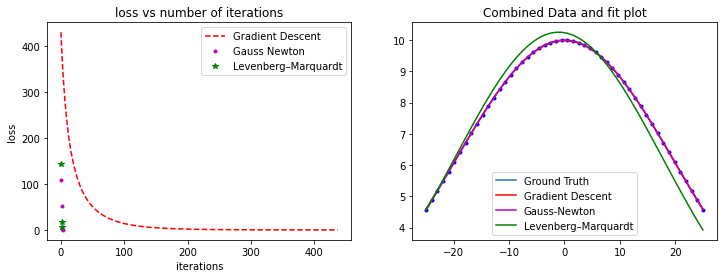

In [33]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")
ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved, ygn, lgn,"Gauss-Netwon")
ylm,llm = LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
plot(xObserved,yObserved, ylm, llm,"Levenberg–Marquardt")
print("From the above graphs we can see that for the parameters that Gradient descent performs poorly when compared to the other two. This is observable from the number of iterations taken for each algorithm to converge. The graph for Gradient descent is on another scale. This demonstrates the superiority of the other two optimisation methods to gradient descent.")
print("While for the given set of initialisations, Gauss newton outperforms gradient descent, this observation is extended for other initialisations as well. Gauss newton is able to converge to the local minima faster than gradient descent as it assumes that each funcion is locally quadratic.")
print("Sadly, that comes with it's own drawbacks, this involves knowledge obtained from the second derivate, computation of which is very intensive and thus proves to be rather infeasible.")
print("This is where the Levenberg–Marquardt algorithm comes into its own. When far away from a minima, it acts like a gradient descent optimisation method. This is feasible thanks to its low computation cost. As the parameters converge to the minima, the Levenberg–Marquardt algorithm uses the Gauss Newton optimisation algorithm to find the minima.")
combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# Optimising Gradient descent parameters

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015483e-05  s_est: 20.02827347657325


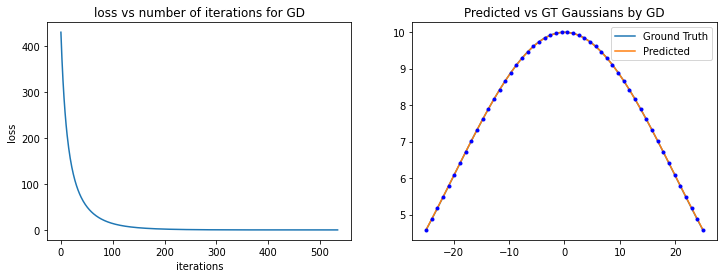

In [34]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-3)
plot(xObserved,yObserved,ygd, lgd,"GD")

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015483e-05  s_est: 20.02827347657325


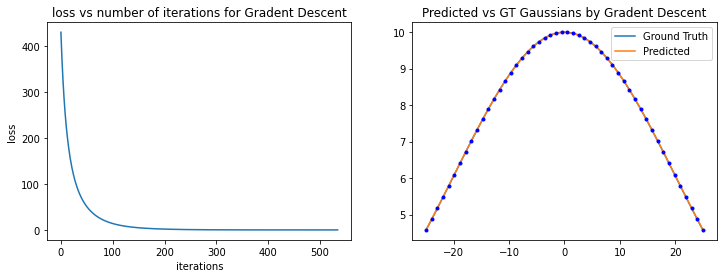

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.00038106941686028484  s_est: 20.089773728976823


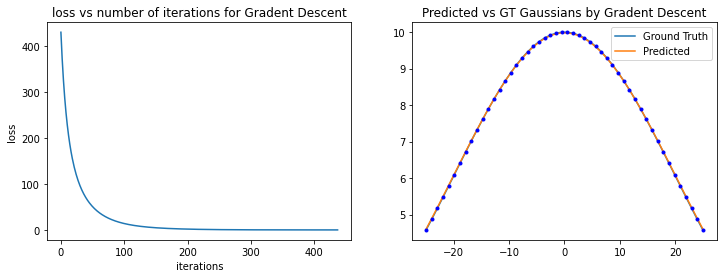

Gradient Descent converged at iteration  337
loss: 0.09899244775254405
a_est: 9.948877534392215  m_est: 0.006139702817200656  s_est: 20.288135634862773


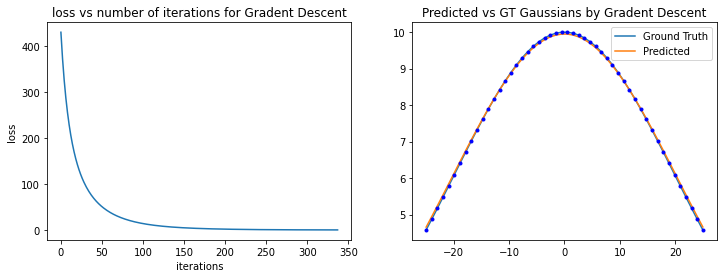

Gradient Descent converged at iteration  229
loss: 0.987187984382076
a_est: 9.840596816487373  m_est: 0.10601728929519513  s_est: 20.933421866901355


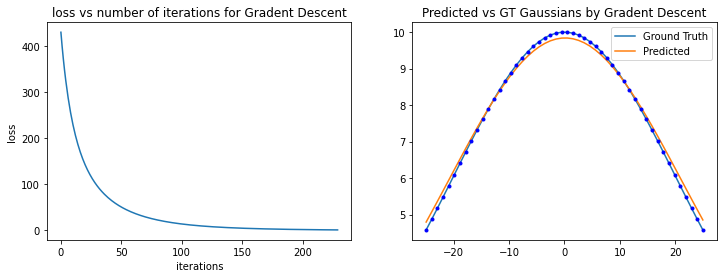

Gradient Descent converged at iteration  115
loss: 9.82926026832871
a_est: 9.608692938123435  m_est: 1.4171677571178711  s_est: 22.52246893455725


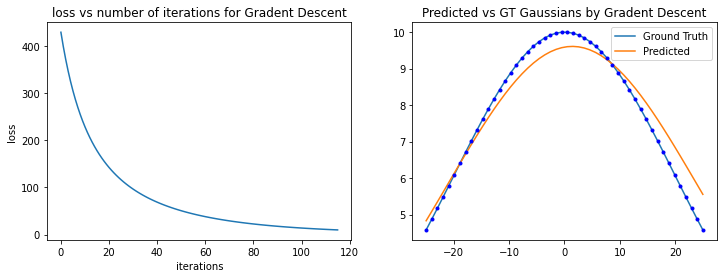

Gradient Descent converged at iteration  30
loss: 96.50726091112921
a_est: 9.640735602761751  m_est: 6.916899538292488  s_est: 22.826981339510322


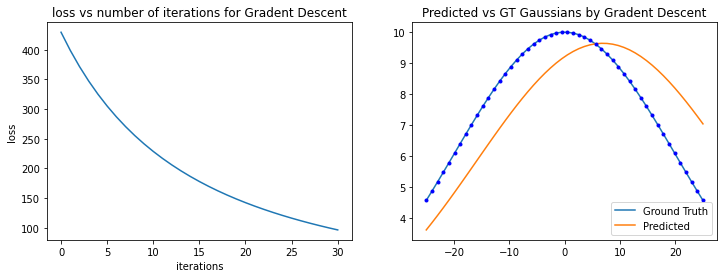

In [35]:
tolerance = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
for t in tolerance:
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,t)
    plot(xObserved,yObserved,ygd, lgd,"Gradent Descent")

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.0001
loss: 244.4873746127026
a_est: 9.918497561085033  m_est: 10.42188691583679  s_est: 21.134393038947387


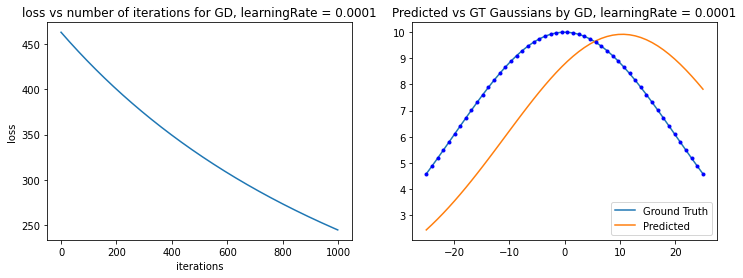

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.001
loss: 14.12379156897434
a_est: 9.582518592742808  m_est: 1.9573486106891098  s_est: 22.740049303536807


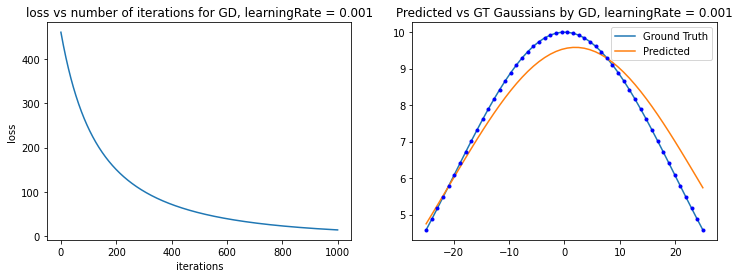

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.00038106941686028484  s_est: 20.089773728976823


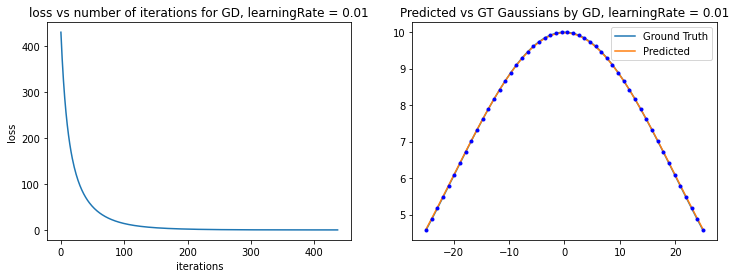

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318181  m_est: 80.49221057521619  s_est: -9.042245279619374


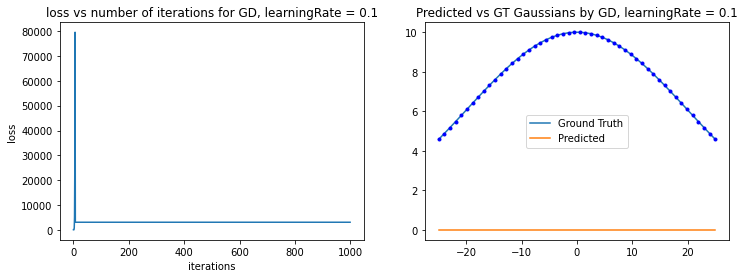

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1.0
loss: 251.12364291815305
a_est: 440142.668853555  m_est: -167867.68666039302  s_est: -36167.47894579439


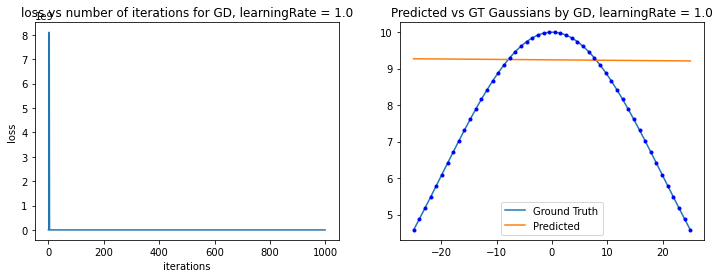

In [36]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1])

for l in learningrate:
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-2)
    plot(xObserved,yObserved,ygd, lgd,"GD, learningRate = "+str(l))

As we see on increasing tolerance the algo converges in less number of iterations but loss starts increasing

# Comparing among the 3 algorithms 

Setting learning rate for LM as 10, from experimentations(on reducing it doesnt converge(explanable since learning rate is multiplied or divided by 10 depending on error is reduced or increased)


 tolerance  0.001
Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015483e-05  s_est: 20.02827347657325
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.001  learning rate 1e-05
loss: 7.725367181265488
a_est: 9.463806979835072  m_est: 0.07721116212087374  s_est: 20.313831977152343


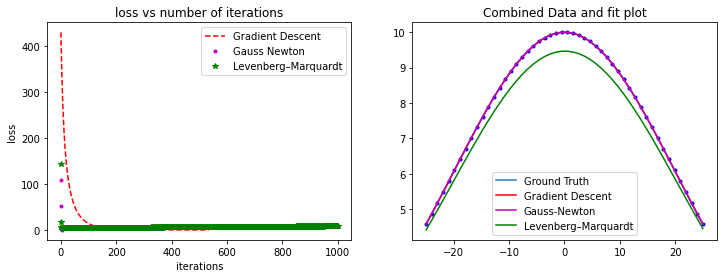


 tolerance  0.01
Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.00038106941686028484  s_est: 20.089773728976823
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1e-05
loss: 7.725367181265488
a_est: 9.463806979835072  m_est: 0.07721116212087374  s_est: 20.313831977152343


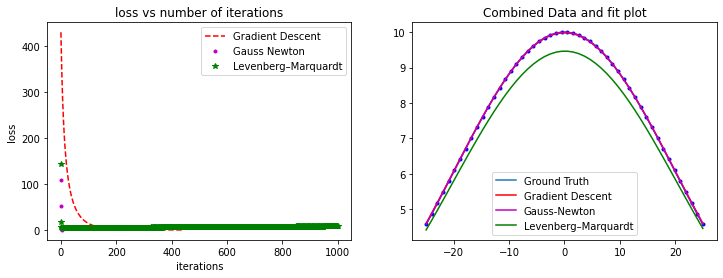


 tolerance  0.1
Gradient Descent converged at iteration  337
loss: 0.09899244775254405
a_est: 9.948877534392215  m_est: 0.006139702817200656  s_est: 20.288135634862773
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 7.725367181265488
a_est: 9.463806979835072  m_est: 0.07721116212087374  s_est: 20.313831977152343


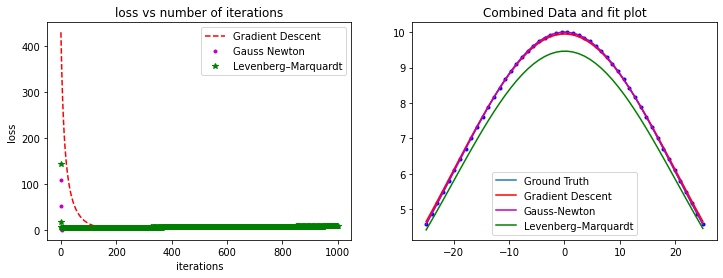


 tolerance  1.0
Gradient Descent converged at iteration  229
loss: 0.987187984382076
a_est: 9.840596816487373  m_est: 0.10601728929519513  s_est: 20.933421866901355
Gauss Newton converges at iteration  2
loss: 0.9331254378985003
a_est: 9.88531666444999  m_est: -0.3619871973281108  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 1.0  learning rate 1e-05
loss: 7.725367181265488
a_est: 9.463806979835072  m_est: 0.07721116212087374  s_est: 20.313831977152343


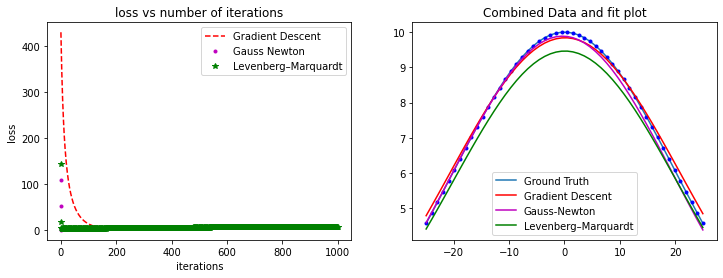


 tolerance  10.0
Gradient Descent converged at iteration  115
loss: 9.82926026832871
a_est: 9.608692938123435  m_est: 1.4171677571178711  s_est: 22.52246893455725
Gauss Newton converges at iteration  2
loss: 0.9331254378985003
a_est: 9.88531666444999  m_est: -0.3619871973281108  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  2
loss: 5.730362110598657
a_est: 10.254077061575403  m_est: -1.0498505979479558  s_est: 18.798688886556164


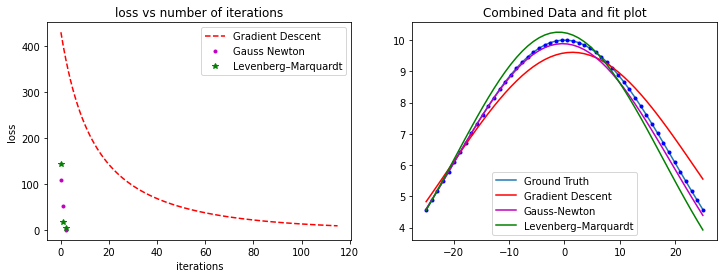


 tolerance  100.0
Gradient Descent converged at iteration  30
loss: 96.50726091112921
a_est: 9.640735602761751  m_est: 6.916899538292488  s_est: 22.826981339510322
Gauss Newton converges at iteration  1
loss: 52.36132656683996
a_est: 9.855255737881372  m_est: -2.482368821153222  s_est: 17.191041633602566
Levenberg–Marquardt converges at iteration  1
loss: 17.75304170370215
a_est: 9.259792284703648  m_est: 1.6736784343233433  s_est: 23.874714922894462


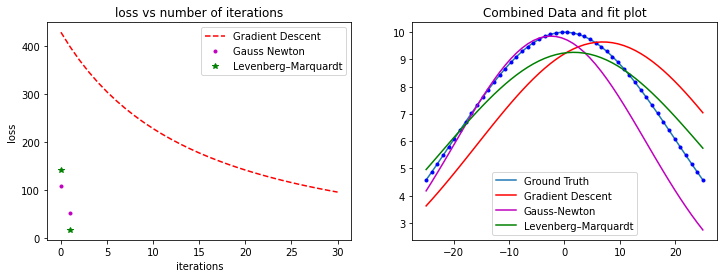

In [37]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
tolerance = np.array([1e-3,1e-2,1e-1,1,1e+1,1e+2])
for tol in tolerance:
    print("\n tolerance ",tol)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,tol)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
Yes, the Gauss newton algorithm converges for initial estimates which are relatively far from the Ground Truth.

for a_est: 20.0  m_est: 13.0  s_est: 19.2
Gradient Descent converged at iteration  401
loss: 0.009796680630617503
a_est: 9.983914372250908  m_est: 0.000669170424070235  s_est: 20.08957755979924
Gauss Newton converges at iteration  3
loss: 0.000299813684922381
a_est: 9.997568405154453  m_est: -0.007860524973486327  s_est: 20.003165014529056
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 3226.679398346162
a_est: 3.6978394936060774  m_est: 86.13024517356499  s_est: 5.001068009576397


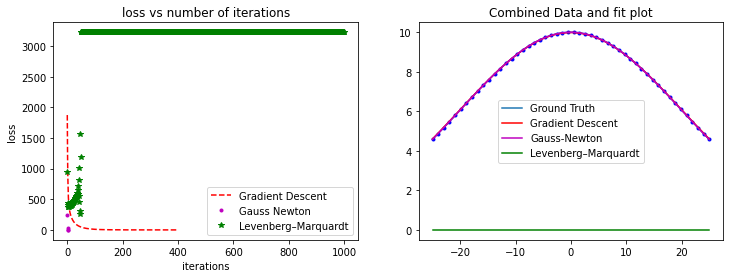

for a_est: 15.0  m_est: 15.0  s_est: 30.0
Gradient Descent converged at iteration  890
loss: 0.009864920462375382
a_est: 9.983857418338392  m_est: 1.4524153694156726e-05  s_est: 20.089896470068705
Gauss Newton converges at iteration  2
loss: 0.00434744376387717
a_est: 9.984687614860787  m_est: -0.0008925681619245118  s_est: 20.031617130516278
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 776.5839481183143
a_est: 14.931537670184312  m_est: 0.01730087012121284  s_est: 19.901345478412956


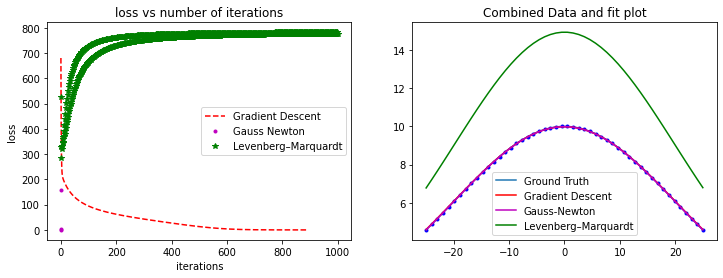

for a_est: 0.0  m_est: 5.0  s_est: 30.0
Gradient Descent converged at iteration  657
loss: 0.009952980128885996
a_est: 9.983785522880186  m_est: 2.0620867812456365e-05  s_est: 20.090299064355474
Gauss Newton converges at iteration  4
loss: 8.389378771675822e-06
a_est: 9.999896348612031  m_est: -0.0009580232171908787  s_est: 19.998668017574058
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 506.7721190097782
a_est: 6.0294857659938454  m_est: 0.019331849067888013  s_est: 20.071697200361246


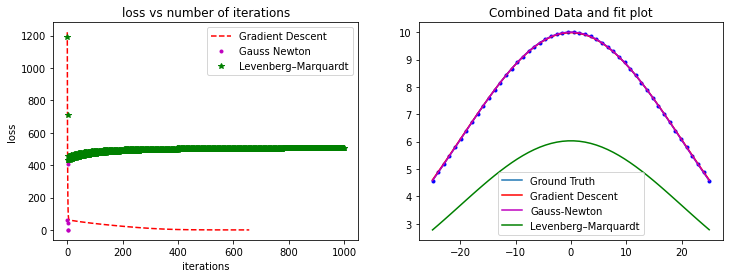

for a_est: 10.0  m_est: 5.0  s_est: 45.0
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094342  s_est: 28.942726366387507
Gauss Newton converges at iteration  4
loss: 2.855127985294062e-06
a_est: 9.999949564582622  m_est: -0.0005494856136394055  s_est: -19.99918552898828
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 142.1060367157076
a_est: 12.12035594373038  m_est: 0.001246506108055108  s_est: 19.896640481179414


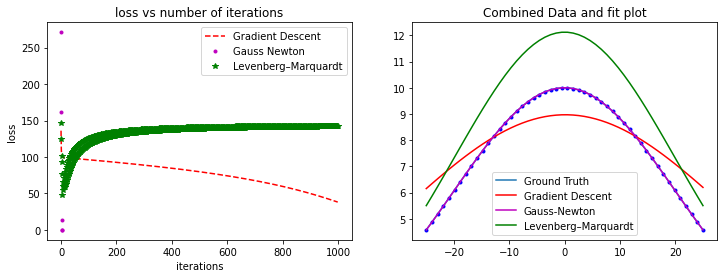

In [38]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Observation: gauss newton is able to handle really far off estimates well, Gradient descent too handles to some extent. But LM is not able to handle far off estimations <br>
Note: the first graph seems to be shooting out of scale just becoause the LM algorithm didn't converge as it overshot to large values.The GD and Gauss-Newton have converged.

Different number of observations: Can a particular algorithm handle very less observations?

for 3 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 12.810563193203759
a_est: 7.294684254352  m_est: 4.297665940094786  s_est: 43.592465589006416
Gauss Newton converges at iteration  3
loss: 6.392625656043453e-05
a_est: 9.998244588638427  m_est: -0.0036187727889825383  s_est: -19.98710431578631
Levenberg–Marquardt converges at iteration  3
loss: 5.871398282529585
a_est: 7.912261994938874  m_est: -0.5284501715846761  s_est: 28.898545524538786


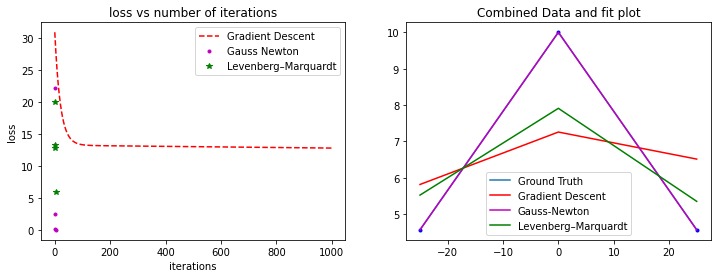

for 5 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 14.53206008502124
a_est: 7.863127904599456  m_est: 3.9810583385192375  s_est: 43.30548274504767
Gauss Newton converges at iteration  3
loss: 0.007015598824403902
a_est: 9.982448276627636  m_est: 0.03373519885723819  s_est: -19.892406162819146
Levenberg–Marquardt converges at iteration  3
loss: 5.217692398340131
a_est: 8.315350470432676  m_est: -1.4110666938617271  s_est: 25.4091574580058


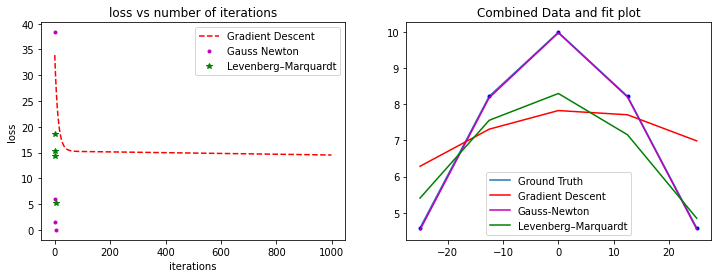

for 8 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 19.18183621802356
a_est: 8.117930289445017  m_est: 3.5315582026017753  s_est: 42.717970130675575
Gauss Newton converges at iteration  3
loss: 0.007730280682776545
a_est: 9.988577199087958  m_est: -0.030128415358789573  s_est: -19.89809957757157
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 39.57348838924519
a_est: 7.103742112586673  m_est: -0.019617941645490133  s_est: 20.09045951298489


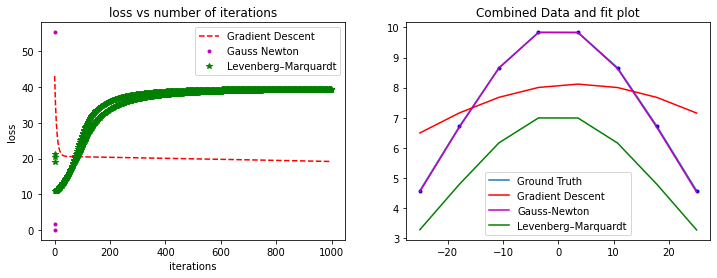

for 10 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 22.26011891799478
a_est: 8.199698846827218  m_est: 3.2481737193264504  s_est: 42.29147012641224
Gauss Newton converges at iteration  3
loss: 0.00786459119096223
a_est: 9.985447214572805  m_est: -0.05710307896642641  s_est: -19.93203448923023
Levenberg–Marquardt converges at iteration  34
loss: 9.647267117705896
a_est: 10.15217177641713  m_est: 1.6313412104104452  s_est: 24.559553509246733


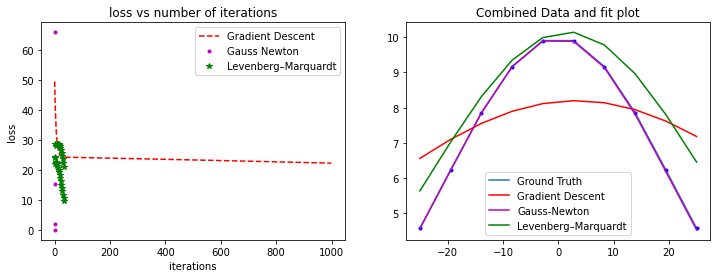

for 12 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 25.24847203960771
a_est: 8.256100462938628  m_est: 2.977366620428282  s_est: 41.84363531919719
Gauss Newton converges at iteration  3
loss: 0.008471865756035276
a_est: 9.98075694969458  m_est: -0.06882382598615422  s_est: -19.966465184641056
Levenberg–Marquardt converges at iteration  18
loss: 9.101761699327662
a_est: 9.831761581804036  m_est: 1.148407126740851  s_est: 25.35997671862016


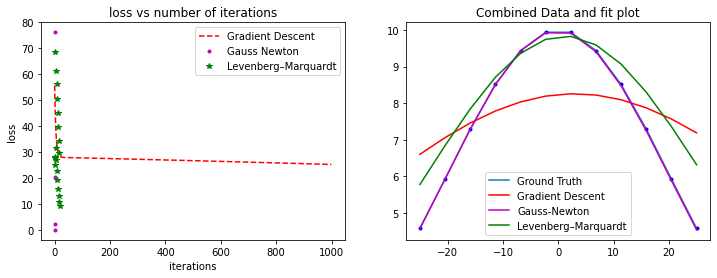

for 15 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 29.515258706353507
a_est: 8.317735304141657  m_est: 2.594417590382066  s_est: 41.134968118113896
Gauss Newton converges at iteration  3
loss: 0.009719032635457887
a_est: 9.974072170598296  m_est: -0.06938762605330817  s_est: -20.008381454161505
Levenberg–Marquardt converges at iteration  12
loss: 8.593574704214946
a_est: 9.113253916972392  m_est: 0.6918306308314705  s_est: 26.431712579881463


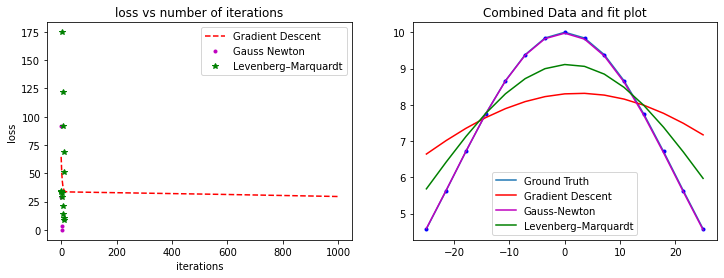

for 20 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 35.93130132069082
a_est: 8.394526490914519  m_est: 2.017463659562056  s_est: 39.856855411409036
Gauss Newton converges at iteration  4
loss: 2.385757817344161e-07
a_est: 9.999961027966563  m_est: 0.0003366847681354479  s_est: -19.99976952720658
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 48.33332084868578
a_est: 11.979994188146291  m_est: -0.001167227368993759  s_est: 19.88953144179283


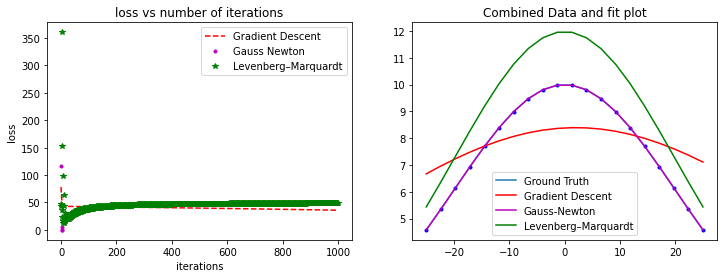

for 22 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.21412956776219
a_est: 8.421676611465672  m_est: 1.807965352209529  s_est: 39.31062904290413
Gauss Newton converges at iteration  4
loss: 3.271145691776419e-07
a_est: 9.999969172763976  m_est: 0.00031677838367984157  s_est: -19.999638954474374
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 63.42881331965367
a_est: 12.155399951012804  m_est: -0.0008774671271068596  s_est: 19.897447312671495


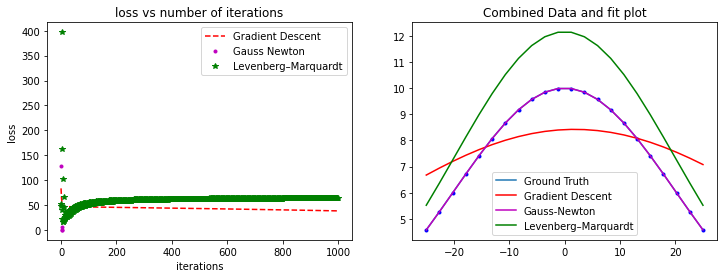

for 25 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 41.285518445649984
a_est: 8.46153090267852  m_est: 1.5164068052808461  s_est: 38.45169482685636
Gauss Newton converges at iteration  4
loss: 4.738859213669028e-07
a_est: 9.999978227404668  m_est: 0.00024522361793505656  s_est: -19.9994749139841
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 88.1700938221415
a_est: 12.375320183832788  m_est: -0.0006796303941616275  s_est: 19.90554217307271


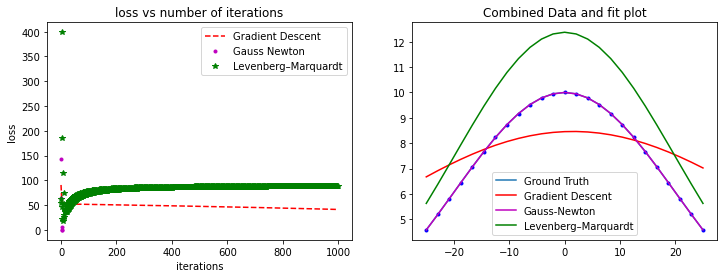

for 28 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 43.876586797733545
a_est: 8.502077473135923  m_est: 1.2520033545850309  s_est: 37.542498492396334
Gauss Newton converges at iteration  4
loss: 6.42859665907325e-07
a_est: 9.999983193463464  m_est: 0.00014654311714296098  s_est: -19.999352332616247
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 105.1675894685992
a_est: 12.446382722370423  m_est: -0.0006124510135824407  s_est: 19.90773150671539


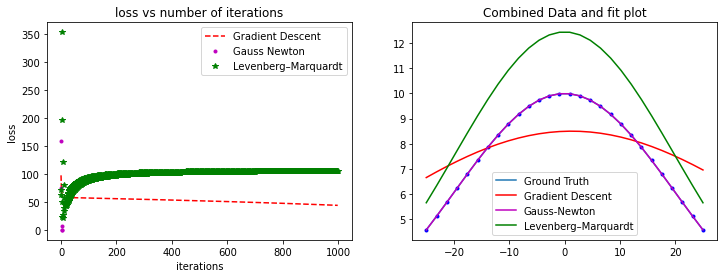

for 30 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 45.299966848650435
a_est: 8.530266296186623  m_est: 1.0907857699902372  s_est: 36.90664480855761
Gauss Newton converges at iteration  4
loss: 7.713311244323567e-07
a_est: 9.99998444551141  m_est: 7.426136720084173e-05  s_est: -19.999291517644988
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 105.27048650915032
a_est: 12.36364015750505  m_est: -0.0006045654816965937  s_est: 19.905074541216226


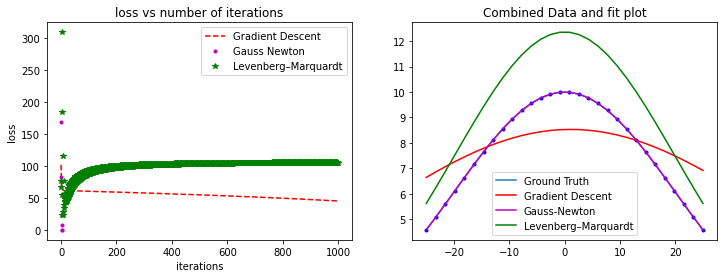

for 34 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.294861023535155
a_est: 8.591279251813113  m_est: 0.8043533049612975  s_est: 35.55793038241764
Gauss Newton converges at iteration  4
loss: 1.0725231352693756e-06
a_est: 9.999982960979157  m_est: -7.24751205092725e-05  s_est: -19.999210686563497
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 96.86312185732956
a_est: 12.130143832668995  m_est: -0.0005320346282744193  s_est: 19.89659903269909


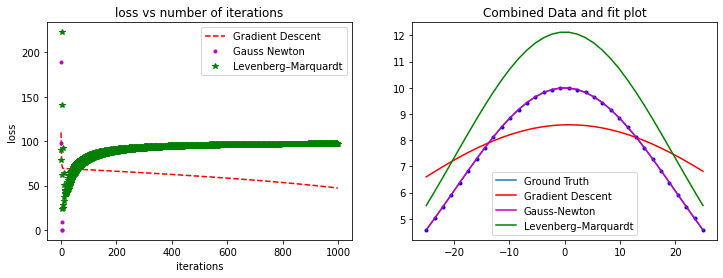

for 38 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.93054358865528
a_est: 8.661296291104819  m_est: 0.5656008398820976  s_est: 34.09708386814903
Gauss Newton converges at iteration  4
loss: 1.4356588270651757e-06
a_est: 9.999977541954916  m_est: -0.0002118146797726872  s_est: -19.999170911885173
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 95.14237562883167
a_est: 11.99697233432262  m_est: -0.0002934508935716375  s_est: 19.891045395633668


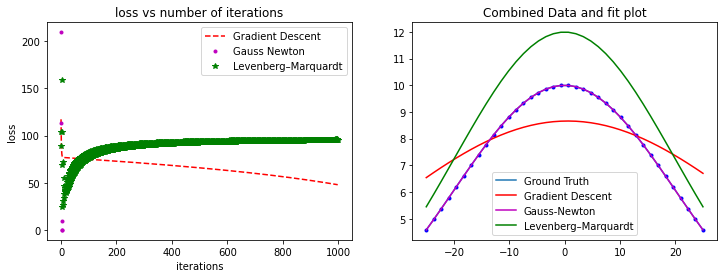

for 42 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 46.87860661320902
a_est: 8.744238877947652  m_est: 0.3737597523980274  s_est: 32.512315067848256
Gauss Newton converges at iteration  4
loss: 1.8582212141455318e-06
a_est: 9.999969554277271  m_est: -0.00033833304613450216  s_est: -19.999159234519464
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 101.85742644304248
a_est: 11.964169745896392  m_est: 0.00011686995241180255  s_est: 19.889727270297364


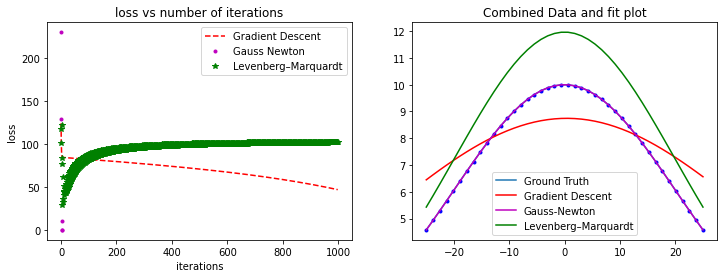

for 48 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 41.293104317267925
a_est: 8.904053626290896  m_est: 0.1702640020684504  s_est: 29.88431603467249
Gauss Newton converges at iteration  4
loss: 2.5893024619164188e-06
a_est: 9.999954855966209  m_est: -0.0005017333357423825  s_est: -19.999174698425204
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 130.18787483193327
a_est: 12.072790818303634  m_est: 0.000943939458332984  s_est: 19.894681570174715


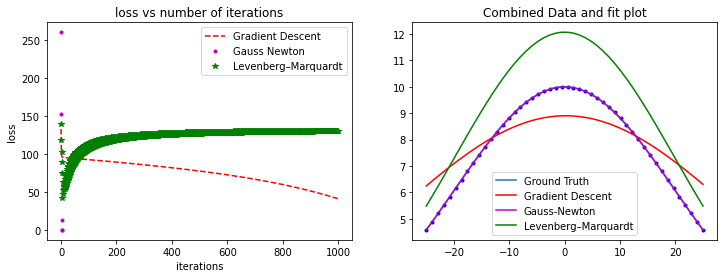

for 50 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094342  s_est: 28.942726366387507
Gauss Newton converges at iteration  4
loss: 2.855127985294062e-06
a_est: 9.999949564582622  m_est: -0.0005494856136394055  s_est: -19.99918552898828
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 142.1060367157076
a_est: 12.12035594373038  m_est: 0.001246506108055108  s_est: 19.896640481179414


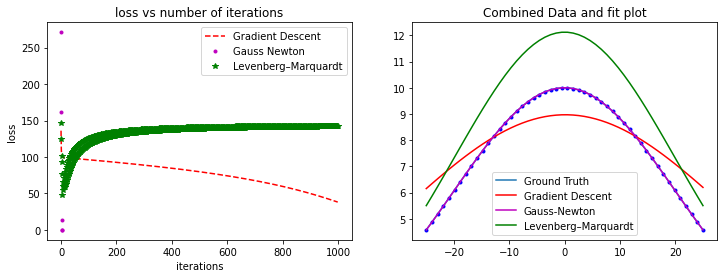

for 52 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 34.43698701348161
a_est: 9.043410858677065  m_est: 0.08597542753131511  s_est: 27.973660362755737
Gauss Newton converges at iteration  4
loss: 3.1304622226272524e-06
a_est: 9.999944175140818  m_est: -0.00059414483206887  s_est: -19.999198271901065
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 155.25170545776064
a_est: 12.171751942354467  m_est: 0.0015507774048753448  s_est: 19.8986396382792


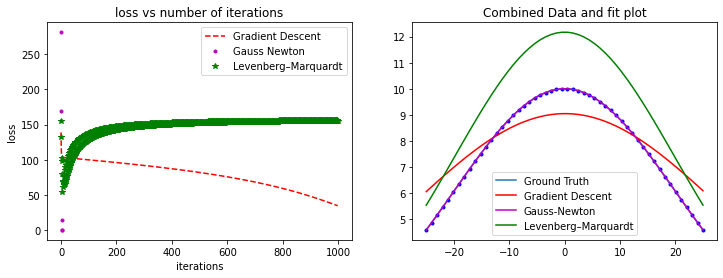

for 55 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 27.71875507100178
a_est: 9.169260586618673  m_est: 0.045756141888986857  s_est: 26.487065555748035
Gauss Newton converges at iteration  4
loss: 3.5594098808815576e-06
a_est: 9.999935998972074  m_est: -0.0006557349331454618  s_est: -19.999220089665425
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 176.65741686109814
a_est: 12.250464005080207  m_est: 0.0020046141709472165  s_est: 19.901490893615577


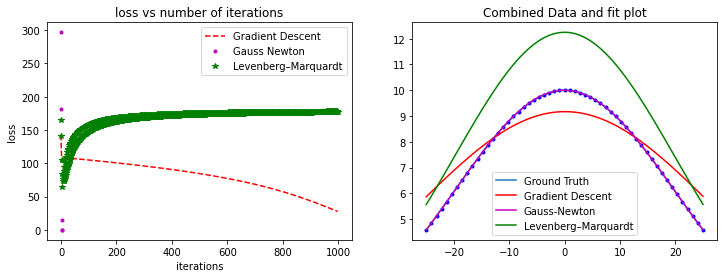

for 60 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 15.147841436374128
a_est: 9.416673278684682  m_est: 0.01178875611745733  s_est: 24.061187097209338
Gauss Newton converges at iteration  4
loss: 4.310422796194018e-06
a_est: 9.999922384172322  m_est: -0.0007455152165137674  s_est: -19.999261131884314
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 214.29340186594044
a_est: 12.370053238246404  m_est: 0.0027636454205578476  s_est: 19.905386863196675


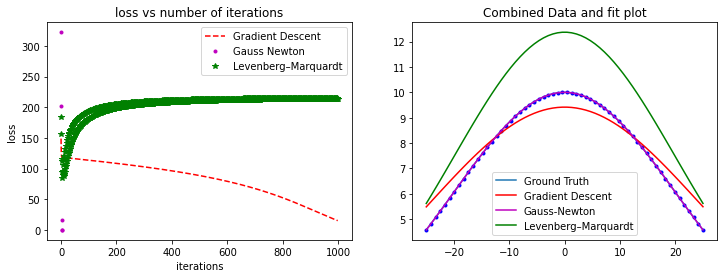

In [39]:
numberOfObservations = np.array([3,5,8,10,12,15,20,22,25,28,30,34,38,42,48,50,52,55,60])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

Add noise to your observations: Can a particular algorithm handle large noise?

for * 0.0001  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18538768965445
a_est: 8.969959737571845  m_est: 0.12353130778881896  s_est: 28.945574461004096
Gauss Newton converges at iteration  4
loss: 4.381839869440106e-05
a_est: 9.99994892561421  m_est: -0.00042909295355482435  s_est: -20.00068968559991
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 142.31843473782305
a_est: 12.122131726230561  m_est: 0.0006661006354538937  s_est: 19.896885548820666


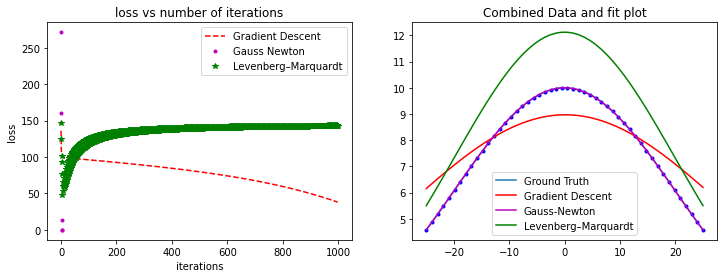

for * 0.0002  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.19397420408596
a_est: 8.969219698798534  m_est: 0.12463412037716898  s_est: 28.94608119169417
Gauss Newton converges at iteration  4
loss: 0.00020473098823527638
a_est: 9.999314217351902  m_est: 0.00010511602356542277  s_est: -19.999927393808065
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 142.73262696294174
a_est: 12.124923347537958  m_est: 0.0007397366056381832  s_est: 19.894513492560247


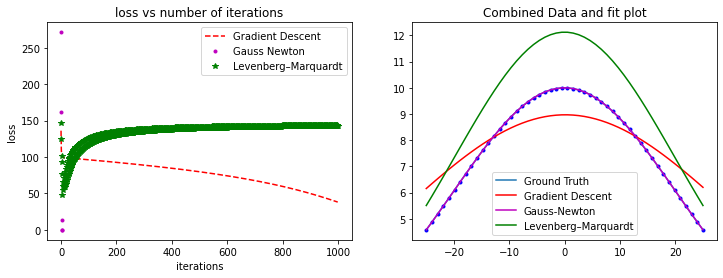

for * 0.001  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.165240819713006
a_est: 8.973701444223053  m_est: 0.12845927059013998  s_est: 28.89589631196231
Gauss Newton converges at iteration  4
loss: 0.006674590370735464
a_est: 10.003490834316255  m_est: 0.002106952041073293  s_est: -19.983505619073938
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 138.9381950202733
a_est: 12.097509042515885  m_est: 0.010699304074060452  s_est: 19.89704941874983


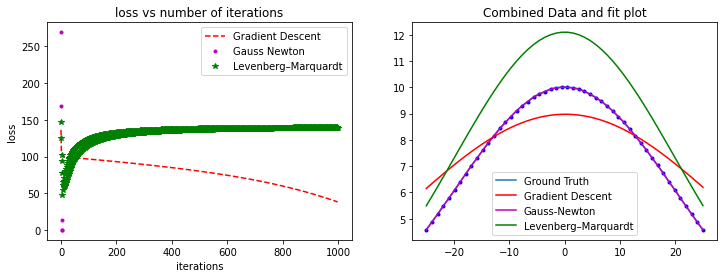

for * 0.002  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.28398657498349
a_est: 8.967966370840339  m_est: 0.1298442085823255  s_est: 28.924332031699333
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.02639308639377132
a_est: 9.999403922780136  m_est: 0.004846870493273713  s_est: -19.98430249304116
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 135.01083695850465
a_est: 12.060939288800187  m_est: -0.009447634922977607  s_est: 19.909747481945697


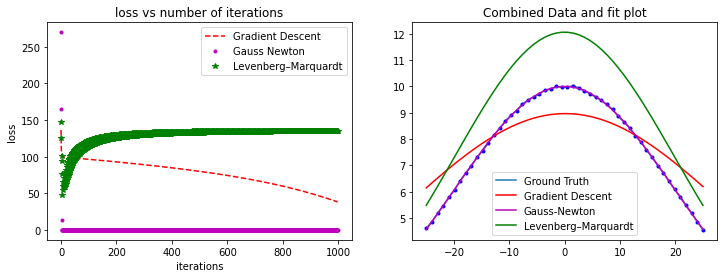

for * 0.01  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.427740597392926
a_est: 8.984850275166117  m_est: 0.08026974863942347  s_est: 28.859785469379766
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.39517668803338246
a_est: 10.01308255475921  m_est: -0.025267971632568886  s_est: -19.984443950159054
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1e-05
loss: 139.70834947549335
a_est: 12.11420354936741  m_est: 0.029105925695542545  s_est: 19.876438800616718


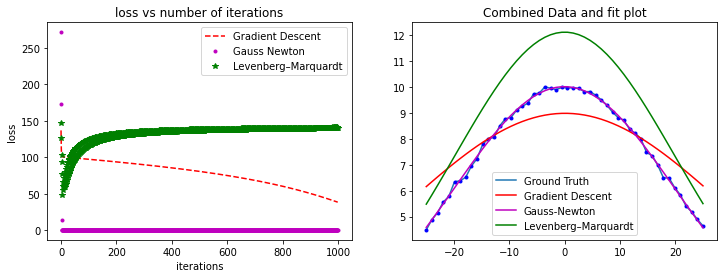

In [40]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)
    

For higer noise , nonce converge, for low and medium noise only Gauss Newton converges, given learning rate and tolerance kept fixed for convergence on initial conditions of no noise

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0001
loss: 244.4873746127026
a_est: 9.918497561085033  m_est: 10.42188691583679  s_est: 21.134393038947387
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 170648.75844547476
a_est: 66.24298312894703  m_est: 7.048583938740194e-12  s_est: -949.6226500895418


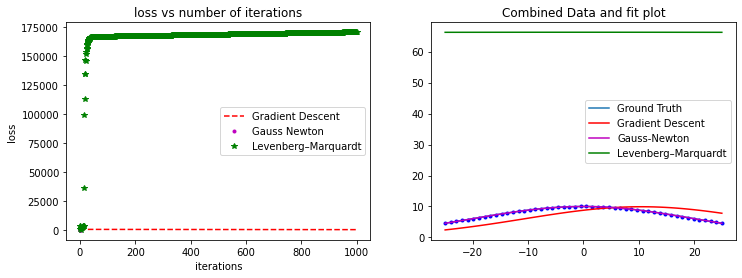

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.001
loss: 14.12379156897434
a_est: 9.582518592742808  m_est: 1.9573486106891098  s_est: 22.740049303536807
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 39.42934638885221
a_est: 11.148833779156208  m_est: -1.9819363843505141e-13  s_est: 19.773148165328365


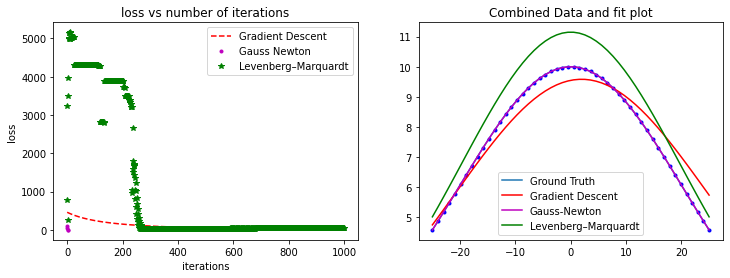

Gradient Descent converged at iteration  337
loss: 0.09899244775254405
a_est: 9.948877534392215  m_est: 0.006139702817200656  s_est: 20.288135634862773
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 3226.679398346662
a_est: -53.16031538065345  m_est: 119.07130532441599  s_est: 12.47335056779396


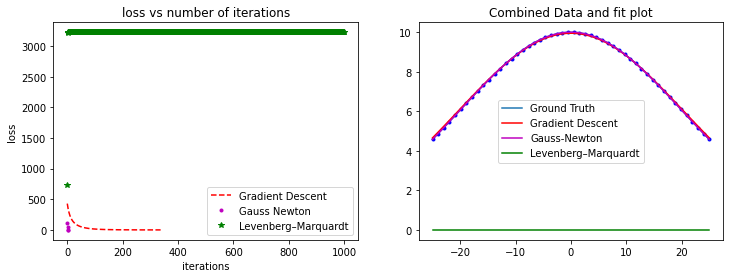

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318181  m_est: 80.49221057521619  s_est: -9.042245279619374
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 3226.679398346162
a_est: -1.0612884383911725  m_est: -121.4652985890534  s_est: 10.599873929427844


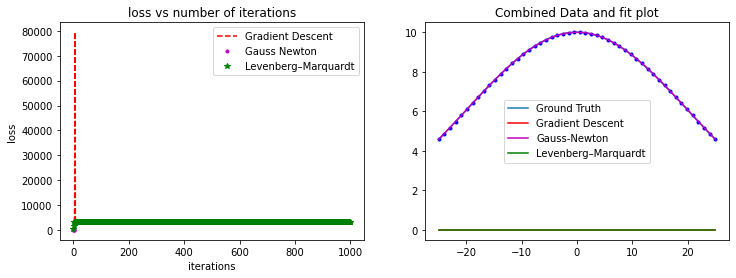

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1.0
loss: 251.12364291815305
a_est: 440142.668853555  m_est: -167867.68666039302  s_est: -36167.47894579439
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 40.5906940504457
a_est: 11.156814692676306  m_est: 0.0308148012041145  s_est: 19.81636468184941


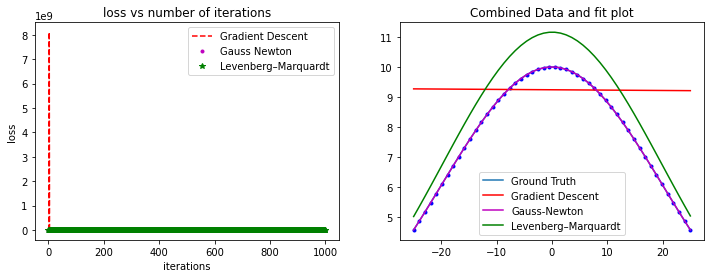

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 2.0
loss: 3226.679398346162
a_est: -285725.2570507006  m_est: -72661.47692430382  s_est: -1907.0478644910545
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 2.0000000000000003e-06
loss: 0.3073636249776708
a_est: 10.063010116045803  m_est: -0.2780036908488248  s_est: 19.927952630532815


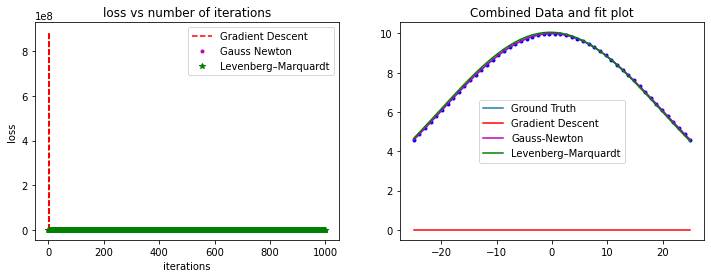

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 3.0
loss: 8.423178055649006e+42
a_est: 3.0266628787154445e+26  m_est: -5.5626608259276775e+25  s_est: -1.0701024986110614e+25
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 3.0000000000000005e-06
loss: 2.408169174734911
a_est: 9.672532453592023  m_est: -0.13484684469815986  s_est: 20.415043309697648


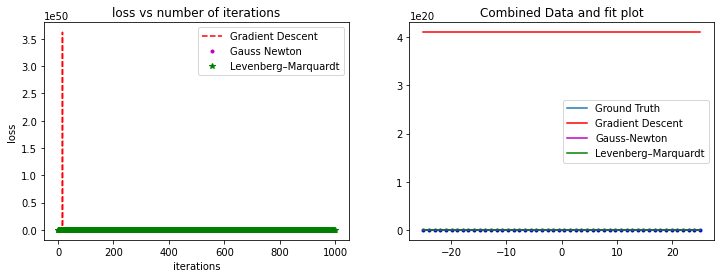

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.0
loss: 3226.679398346162
a_est: -5.278964383183756e+22  m_est: -2.728357123780724e+22  s_est: 4.719928304674296e+20
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.000000000000001e-06
loss: 3.3400889960743303
a_est: 9.627250045766827  m_est: -0.0778398565555079  s_est: 20.357668727978933


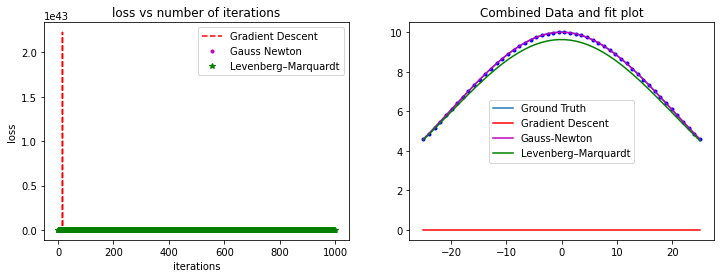

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5.0
loss: 3226.6793983461585
a_est: 186720.2634522773  m_est: -13284.999559735226  s_est: -1399.0041632119846
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5e-06
loss: 3.177381647385965
a_est: 9.636775233132123  m_est: -0.04288773085579304  s_est: 20.34132836839301


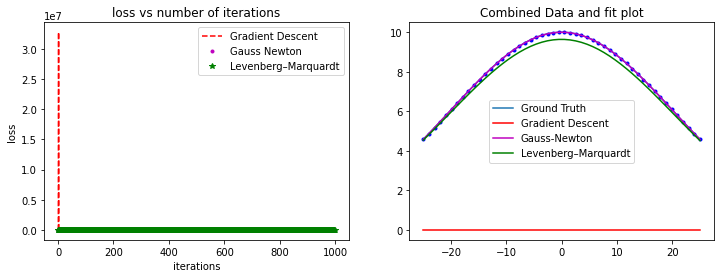

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.0
loss: 3226.6793985238173
a_est: -2094.2695584751395  m_est: -436.9266543183354  s_est: 55.27525591406922
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.000000000000001e-06
loss: 4.31728793403492
a_est: 9.585864525397175  m_est: 0.058434223308112834  s_est: 20.328784729991966


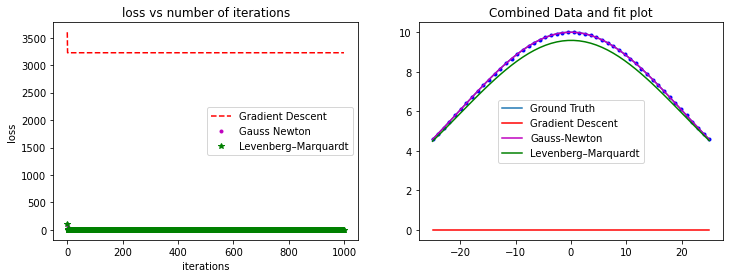

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 10.0
loss: 3226.679398346162
a_est: -3169.154847303528  m_est: -591.1815735283045  s_est: 16.74004838747203
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591207389  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1e-05
loss: 7.725367181265488
a_est: 9.463806979835072  m_est: 0.07721116212087374  s_est: 20.313831977152343


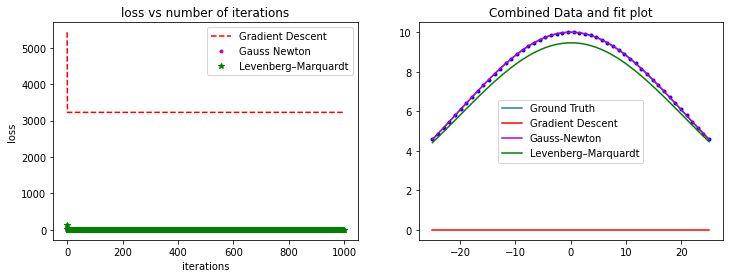

In [41]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1,2,3,4,5,8,10])

for l in learningrate:    
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,l,1e-1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
We experiment intensively as shown in figures shown above and report some of our experimentations. <br>
**observed trends** <br> 1) if learning rate is increased too much or decreased a lot Gradient descent algorithm doesnt converge. <br>
Explanation: because gradient descent would take much smaller or much larger steps in above case hence it doesnt converge. <br>
2)Decrease in tolerance results in decrease in loss and number of iterations<br>
Explnation: Algorithm loop breaks when that tolerance is achieved. For smaller tolerance it thus converges earlier. Also loss is monotonically decreasing hence more loss in observed at earleir convergence.


| Learning rate        | tolerance           | loss  |num of iterations to converge |
| ------------- |:-------------:| -------:|-------:|
| 0.01    | 1e-2     | 0.0098 |437 |
| 0.01    | 1e-1    | 0.098 |337 |
| 0.1    | 1e-2     | 0.0098|437 |
| 1    | 1e-1    | 0.098 |337 |
| 0.0001    | 1e-2   | 244.49(at iter 999) |didn't converge in 999 iterations |
| 0.001    | 1e-2  | 14.12(at iter 999)|didn't converge in 999 iterations |
| 0.01    | 1e-2    | 0.0098 |437 |
| 0.1    | 1e-2  | 3226.67(at iter 999) |didn't converge in 999 iterations |
| 1   | 1e-2   | 251.123(at iter 999) |didn't converge in 999 iterations |

### Answer for 1.2
**Learning rate** 0.01 for Gradient Descent and Gauss Newton
10 for LM <br>
**tolerance** 1e-2 for Gradient Descent and Gauss Newton
1e+1 for LM <br>
The Gradient Descent, Gauss Newton and LM converge for above values in given extimate of  s_gt = 20, a_est = 10, m_est = 13, s_est = 19.12 and 50 observations. <br>
Thus learning rate and tolerance kept fixed for below experimentations in order to find a good comparison of changes from initial convergence. Also in row (for Different initial estimate say) only that row's mentioned change is there, rest all params are kept fixed.


| Action      |  Gradient Descent          | Gauss Newton  |LM   |
| ------------- |:-------------:| -------:|-------:|
| learning rate 10, tolerance 1e+1 | didn't converge in  999 iters, loss:3226.67  | Converges in 2 iters(loss: 0.933)|  Converges in 2 iter(loss:5.730) |
| learning rate 1, tolerance 1e+1 | didn't converge in  999 iters, loss:3226.67  | Converges in 2 iters(loss: 0.933)|  Converges in 2 iter(loss:5.730) |
| learning rate 0.0001 | doesnt converge in 999 iters (loss: 244.48)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(for tolerance 1e-2) | 437(loss: 0.0098)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1e-1) | 337(loss: 0.098)   | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1) | 229(loss:0.987)   | 2(loss: 0.933)|  doesnt converge |
| #Iterations(tolerance 1e+1) | 115 (loss: 9.829)   | 2(loss: 0.933)|  2(loss: 5.73) |
| Different Initial estimate[a,m,s]: far different [  | doesn't converge     | converges|doesn't converge |
| bit different |converges| converges|doesnt converge|
| Different number of observations: v small(<5)  | doesn't converge     | converges|converges |
| small(<=20) |doesn't converge | converges|converges|
| medium(<=42) |doesn't converge | converges|converges|
| large(>=48) |converges | converges|converges|
| on adding small noise  | doesn't converge     | converges|doesn't converge |
| on adding medium noise  | doesn't converge     | doesn't converge|doesn't converge |




Gauss newton converges is lesser iterations and achieves similar loss. Also on varying initial estimates, number of observations and addition of noise Gauss newton is seen to perform well. Though LM is expected to combine pros of both Gradient descent and Gauss Newton it is not able to do so since the learning rate is actually increased way too much(by a factor of 10) and it would overshoot the optima. The gradient descent is not seen to converge on larger learning rates since it would overshoot the minima and keep oscilating. <br>
When learning rate is too small(0.01) Levenberge Marquardt doesnt converge for 1000 iterations whereas Gauss newton does converge.
However we found that on increasing learning rate to 10 along with increasing tolerance, gauss newton converges in 2 iterations with a loss of 5.73. 

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [42]:
# HELPER FUNCTIONS:

# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # creating reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # adding noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [43]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)

# Getting data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# Applying ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # current error?
        rmse = rms(X,P)
        # calling the visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # Implementation of ICP to get R, t
        #Computing the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Computing a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Using the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Using the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

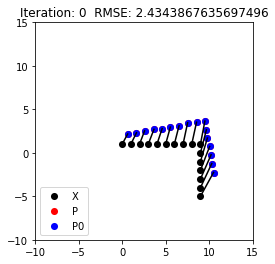

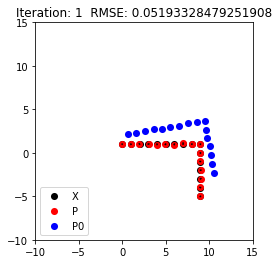

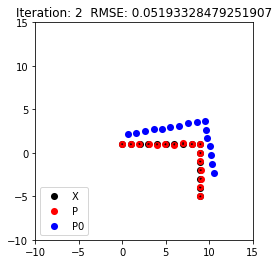

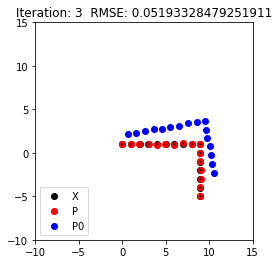

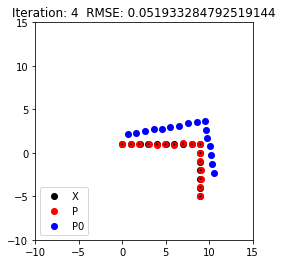

In [44]:
# Call ICP on P1 & P2
ICP(X,P1) 



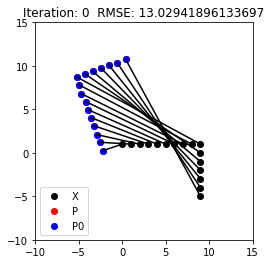

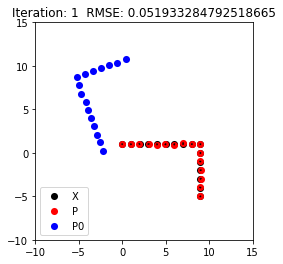

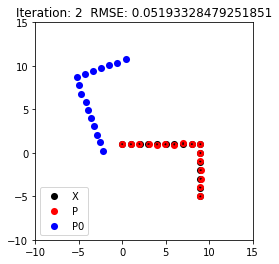

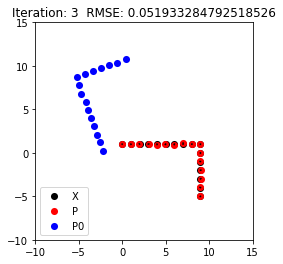

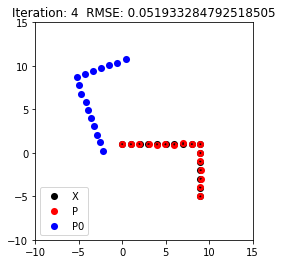

In [45]:
ICP(X,P2) 